In [1]:
import pandas as pd
import numpy as np

# Upload repairs data
dtp = pd.read_excel('C:/Users/sgulbin/Work/Data/accidents/DTP_data_5_15_2020.xlsx')
dtp['Дата и время ДТП'] = pd.to_datetime(dtp['Дата и время ДТП'], dayfirst=False, errors = 'coerce')
dtp['yyyy-mm'] = dtp['Дата и время ДТП'].dt.strftime('%Y-%m')
dtp['date'] = dtp['Дата и время ДТП'].dt.date
dtp['time'] = dtp['Дата и время ДТП'].dt.time
dtp['weekday'] = dtp['Дата и время ДТП'].dt.day_name()
dtp['day_of_year'] = dtp['Дата и время ДТП'].dt.dayofyear
dtp.sort_values('Дата и время ДТП', inplace=True)
dtp['Телефон водителя'] = dtp['Телефон водителя'].replace(np.nan, 0, regex=True)
dtp['Телефон водителя'] = dtp['Телефон водителя'].apply(int)
dtp.reset_index(drop=True, inplace = True)
dtp['ТС'] = dtp['ТС'].str.replace(' ', '')
dtp = dtp[['Дата и время ДТП','yyyy-mm','date','time','weekday','day_of_year','Регион','Телефон водителя','Виновность', 'ТС', 'Модель автомобиля', 'POOL', 'Тариф','Ремонт не производился','Тип ДТП', 'Вид страхования', 'Пострадавшие','Комментарий','Сумма по заказ-наряду','Выставлено', 'Страховая компания сумма выплаченная']].rename(columns={
    'Дата и время ДТП': 'datetime',
    'yyyy-mm': 'yyyy-mm',
    'date':'date',
    'time':'time',
    'weekday': 'weekday',
    'day_of_year':'day_of_year',
    'Регион': 'region',
    'Телефон водителя': 'phone',
    'Виновность': 'responsibility',
    'ТС': 'license_plate',
    'Модель автомобиля': 'vehicle_model',
    'POOL': 'pool',
    'Тариф': 'tariff',
    'Ремонт не производился': 'no_repair_conducted',
    'Тип ДТП': 'accident_type',
    'Вид страхования': 'insurance_type',
    'Пострадавшие': 'injured',
    'Комментарий': 'description',
    'Сумма по заказ-наряду': 'repair_cost',
    'Выставлено': 'vystavleno',
    'Страховая компания сумма выплаченная': 'insurance_paid_sum'
})
# dtp.to_excel('C:/Users/sgulbin/Work/Data/accidents/accidents_data.xlsx', index = False)
dtp

,datetime,yyyy-mm,date,time,weekday,day_of_year,region,phone,responsibility,license_plate,...,pool,tariff,no_repair_conducted,accident_type,insurance_type,injured,description,repair_cost,vystavleno,insurance_paid_sum
0,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Москва,79995812517,Виновен,У389ЕА799,...,No,Базовый,No,NaN,NaN,Нет пострадавших,"поврежден передний бампер немного, из гибдд н...",70801.51,58655.0,NaN
1,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Красноярск,79135819270,Виновен,М022ТМ777,...,No,Базовый,No,Столкновение 2-х и более ТС,NaN,Нет пострадавших,NaN,115128.00,30000.0,NaN
2,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Уфа,79603834871,Виновен,Р842РМ777,...,No,Базовый,No,Наезд на препятствие,NaN,Нет пострадавших,NaN,58030.00,30000.0,NaN
3,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Уфа,79869755951,Виновен,В284ХА777,...,No,Базовый,No,Наезд на препятствие,NaN,Нет пострадавших,NaN,138000.00,30000.0,NaN
4,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79990897596,Виновен,М120МЕ799,...,No,Базовый,No,Столкновение 2-х и более ТС,ОСАГО,Нет пострадавших,Клиент глухонемой ждет в авто нреобходимы меха...,86685.00,30000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19837,2020-05-14 00:00:00,2020-05,2020-05-14,00:00:00,Thursday,135,ТУЛА,79653284776,Виновен,Е596ТВ799,...,No,Базовый,No,NaN,NaN,NaN,Во время движения клиент задел тс второго учас...,NaN,NaN,NaN
19838,2020-05-14 00:00:00,2020-05,2020-05-14,00:00:00,Thursday,135,Екатеринбург,0,NaN,М105ТМ777,...,No,NaN,No,NaN,NaN,NaN,в тс въехало такси и скрылось,NaN,NaN,NaN
19839,2020-05-14 09:30:00,2020-05,2020-05-14,09:30:00,Thursday,135,Москва,79263626436,Виновен,К983МО799,...,No,Базовый,No,Столкновение 2-х и более ТС,Нет страховки,Нет пострадавших,NaN,NaN,NaN,NaN
19840,2020-05-15 00:00:00,2020-05,2020-05-15,00:00:00,Friday,136,Нижний Новгород,79023035592,NaN,К401ВК799,...,No,NaN,No,NaN,NaN,NaN,со слов клиента: не справился с управлением на...,NaN,NaN,NaN


In [2]:
# Filtering and slicing dtp dataframe

# Slicing dtp dataframe to the period 2020-02-01 - 2020-04-30

# !!! REDUCE ANALYZED PERIOD TO FEBRUARY AND MARCH OF 2020 !!!
# !!! REDUCE ANALYZED PERIOD TO FEBRUARY AND MARCH OF 2020 !!!
# !!! REDUCE ANALYZED PERIOD TO FEBRUARY AND MARCH OF 2020 !!!

def make_int(text):
    return int(text.strip('\u202c'))

scores = pd.read_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/users_combined_score.csv', converters={'login':make_int})

dtp = dtp.loc[(dtp.datetime < '2020-04-01')]
# Leaving only rows with "Vystavleno" is not null
dtp = dtp.loc[(pd.isnull(dtp.vystavleno) == False)&(pd.isnull(dtp.repair_cost) == False)&(dtp.phone != 0)&(dtp.responsibility == 'Виновен')]

# Filling gaps in "Repair_cost" and "Vystavleno"
# dtp['repair_cost'] = dtp['repair_cost'].fillna(50510)
# dtp['vystavleno'] = dtp['vystavleno'].fillna(40892)

# Removing "Vystavleno" = 0.01;0.1;1.0
dtp = dtp.loc[(dtp.vystavleno != 0.01)&(dtp.vystavleno != 0.1)&(dtp.vystavleno != 1.0)&(dtp.vystavleno != 0)]
# Removing pool accidents
dtp = dtp.loc[dtp.pool == 'No']
# Mergin same cars into one category
dtp = dtp.replace({'vehicle_model':{'3D':'Mini','5D':'Mini','FORTWO COUPE':'Smart','FORFOUR':'Smart'}})
# Adding users score
dtp = pd.merge(dtp, scores, left_on = 'phone', right_on = 'login', how = 'left')
# Leaving only rows with score available
dtp = dtp.loc[pd.isnull(dtp.score) == False]
dtp

,datetime,yyyy-mm,date,time,weekday,day_of_year,region,phone,responsibility,license_plate,...,insurance_type,injured,description,repair_cost,vystavleno,insurance_paid_sum,user_id,login,score,last_scoring_date
4,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79990897596,Виновен,М120МЕ799,...,ОСАГО,Нет пострадавших,Клиент глухонемой ждет в авто нреобходимы меха...,86685.00,30000.00,NaN,20536695.0,7.999090e+10,0.01,2020-04-01
5,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79633439366,Виновен,Р820ТА777,...,ОСАГО,Нет пострадавших,"позвонил сотрудник ГИБДД 79111944734,сообщил,ч...",124615.00,124615.00,NaN,20421004.0,7.963344e+10,0.11,2020-03-01
8,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79817838920,Виновен,Р816ТА777,...,ОСАГО,Нет пострадавших,кл занесло и он врезался в знак. /фото дсп // ...,11346.00,11346.00,NaN,20348755.0,7.981784e+10,1.00,2020-01-01
9,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79213219298,Виновен,Е326НХ777,...,ОСАГО,Нет пострадавших,"его подрезала машина из правого ряда ,от резко...",20367.00,20367.00,NaN,19716139.0,7.921322e+10,0.40,2020-04-01
10,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79778011234,Виновен,Е322НХ777,...,ОСАГО,Нет пострадавших,"не успел затормозить, въехал в трамвай",70150.00,30000.00,NaN,19501332.0,7.977801e+10,0.59,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79684763343,Виновен,Е775ОР799,...,Нет страховки,Нет пострадавших,на мосту повысил скорость и врезался в огорожд...,12490.58,12490.58,NaN,20461355.0,7.968476e+10,0.01,2020-04-01
8237,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79651705220,Виновен,В154МО799,...,Нет страховки,Нет пострадавших,NaN,26253.33,26253.00,NaN,423500972.0,7.965171e+10,0.25,2020-05-01
8238,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79053223700,Виновен,М976КМ799,...,Нет страховки,Нет пострадавших,не успел затормозить занесло и врезался в отбо...,137163.10,50000.00,NaN,20077769.0,7.905322e+10,0.06,2020-04-01
8239,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79779080396,Виновен,О124НО799,...,Нет страховки,Нет пострадавших,"аш клиент на светофор нажал на газ, его занесл...",89585.90,50000.00,NaN,565250190.0,7.977908e+10,0.02,2020-05-01


In [4]:
# Creating mapping of score and deductible in hypothetical scenario
deductibles = pd.DataFrame(data=np.arange(0.01,1.01,0.01), columns=['score'])
# criteria = [deductibles['score'].between(0.01, 0.0201),\
#             deductibles['score'].between(0.03, 0.1301),\
#             deductibles['score'].between(0.14, 0.3601),\
#             deductibles['score'].between(0.37, 0.6701),\
#             deductibles['score'].between(0.68, 0.8701),\
#             deductibles['score'].between(0.88, 0.9501),\
#             deductibles['score'].between(0.96, 0.9901),\
#             deductibles['score'].between(1.00, 1.0001)]
criteria = [deductibles['score'].between(0.0, 0.04249999),\
            deductibles['score'].between(0.0425, 0.16999),\
            deductibles['score'].between(0.17, 0.34999),\
            deductibles['score'].between(0.35, 0.554999),\
            deductibles['score'].between(0.554999, 0.7334999),\
            deductibles['score'].between(0.7335, 0.87999),\
            deductibles['score'].between(0.88, 0.974999),\
            deductibles['score'].between(9745, 1.0001)]

def create_deductibles(min_d):
    values = []
    for i in range(1,9):
        values.append(min_d*i**0.5)
    return values

# deductibles_prem = [100000,100000,75000,75000,60000,60000,50000,50000]
# deductibles_econ_plus = [75000,75000,50000,50000,40000,40000,30000,30000]
# deductibles_econ = [60000,60000,50000,45000,35000,35000,30000,30000]
deductibles_all1 = [0.9,0.8,0.667,0.5,0.4,0.3,0.15,0.0]
deductibles_all2 = [0.9,0.85,0.7,0.667,0.5,0.4,0.25,0.0]
deductibles_all3 = [0.9,0.75,0.6,0.45,0.3,0.15,0.1,0.0]
deductibles_all4 = [0.9,0.9,0.85,0.65,0.5,0.4,0.15,0.0]
deductibles_all5 = [0.9,0.85,0.80,0.70,0.6,0.5,0.3,0.0]
deductibles_all6 = [0.9,0.85,0.85,0.60,0.5,0.3,0.15,0.0]
deductibles_all7 = [0.9,0.85,0.80,0.65,0.5,0.4,0.3,0.0]

deductibles['deductible_TO_BE1'] = np.select(criteria, deductibles_all1,0)
deductibles['deductible_TO_BE2'] = np.select(criteria, deductibles_all2,0)
deductibles['deductible_TO_BE3'] = np.select(criteria, deductibles_all3,0)

deductibles['deductible_TO_BE4'] = np.select(criteria, deductibles_all4,0)
deductibles['deductible_TO_BE5'] = np.select(criteria, deductibles_all5,0)
deductibles['deductible_TO_BE6'] = np.select(criteria, deductibles_all6,0)
deductibles['deductible_TO_BE7'] = np.select(criteria, deductibles_all7,0)
deductibles['score'] = deductibles.score.round(2)
print(deductibles)

prem_cars = ['GLC 250','Mini','320i','Q3','E 200','A3']
econ_plus_cars = ['Kaptur','QASHQAI','Octavia','Smart','Sportage']
econ_cars = ['Polo','Rio','Solaris','Sandero','Rio X-Line','500']

# Adding hypothetical scenario deductibles
tobe = pd.merge(dtp,deductibles, on = 'score', how = 'left')

# Marking vehicle categories
# tobe['deductible_TO_BE'] = np.where(tobe['vehicle_model'].isin(prem_cars),tobe.deductible_TO_BE_prem,\
#                                    np.where(tobe['vehicle_model'].isin(econ_plus_cars),tobe.deductible_TO_BE_econ_plus,\
#                                            np.where(tobe['vehicle_model'].isin(econ_cars),tobe.deductible_TO_BE_econ,tobe.deductible_TO_BE_econ_plus)))
# tobe['deductible_TO_BE'] = tobe['deductible_TO_BE'].astype(float)
tobe

    score  deductible_TO_BE1  deductible_TO_BE2  deductible_TO_BE3  \
0    0.01               0.90               0.90               0.90   
1    0.02               0.90               0.90               0.90   
2    0.03               0.90               0.90               0.90   
3    0.04               0.90               0.90               0.90   
4    0.05               0.80               0.85               0.75   
..    ...                ...                ...                ...   
95   0.96               0.15               0.25               0.10   
96   0.97               0.15               0.25               0.10   
97   0.98               0.00               0.00               0.00   
98   0.99               0.00               0.00               0.00   
99   1.00               0.00               0.00               0.00   

    deductible_TO_BE4  deductible_TO_BE5  deductible_TO_BE6  deductible_TO_BE7  
0                0.90               0.90               0.90               0.90

,datetime,yyyy-mm,date,time,weekday,day_of_year,region,phone,responsibility,license_plate,...,login,score,last_scoring_date,deductible_TO_BE1,deductible_TO_BE2,deductible_TO_BE3,deductible_TO_BE4,deductible_TO_BE5,deductible_TO_BE6,deductible_TO_BE7
0,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79990897596,Виновен,М120МЕ799,...,7.999090e+10,0.01,2020-04-01,0.900,0.900,0.90,0.90,0.90,0.90,0.90
1,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79633439366,Виновен,Р820ТА777,...,7.963344e+10,0.11,2020-03-01,0.800,0.850,0.75,0.90,0.85,0.85,0.85
2,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79817838920,Виновен,Р816ТА777,...,7.981784e+10,1.00,2020-01-01,0.000,0.000,0.00,0.00,0.00,0.00,0.00
3,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79213219298,Виновен,Е326НХ777,...,7.921322e+10,0.40,2020-04-01,0.500,0.667,0.45,0.65,0.70,0.60,0.65
4,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79778011234,Виновен,Е322НХ777,...,7.977801e+10,0.59,2020-04-01,0.400,0.500,0.30,0.50,0.60,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79684763343,Виновен,Е775ОР799,...,7.968476e+10,0.01,2020-04-01,0.900,0.900,0.90,0.90,0.90,0.90,0.90
6946,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79651705220,Виновен,В154МО799,...,7.965171e+10,0.25,2020-05-01,0.667,0.700,0.60,0.85,0.80,0.85,0.80
6947,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79053223700,Виновен,М976КМ799,...,7.905322e+10,0.06,2020-04-01,0.800,0.850,0.75,0.90,0.85,0.85,0.85
6948,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79779080396,Виновен,О124НО799,...,7.977908e+10,0.02,2020-05-01,0.900,0.900,0.90,0.90,0.90,0.90,0.90


In [25]:
# Ingore warnings

import warnings
warnings.filterwarnings('ignore')

# Easy calc. Leaving only two months: February and March
tobe = tobe.loc[tobe.datetime >= '2020-02-01']
tobe['deductible_AS_IS'] = np.where((tobe.vehicle_model == 'E 200')|(tobe.vehicle_model == 'GLC 250')|(tobe.vehicle_model == '320i'),\
                                   75000,50000)
# Calculating AS IS claim amount for three different claiming efficiency scenarios: 100%, 52.8%, 80%
for i in [1.0, 0.528, 0.8]:
    tobe['vystavleno'+'_'+str(int(i*100))] = tobe['vystavleno']*i
    
# Calculating TO BE claim amount for three deductible scenarios and three claiming efficiency scenarios
for i in [['1',1.0], ['1',0.528], ['1',0.8], ['2',1.0], ['2',0.528], ['2',0.8], ['3',1.0],['3',0.528],['3',0.8],\
          ['4',1.0],['4',0.528],['4',0.8],['5',1.0],['5',0.528],['5',0.8],['6',1.0],['6',0.528],['6',0.8],\
          ['7',1.0],['7',0.528],['7',0.8]]:
    tobe['vystavleno_TO_BE'+i[0]+'_'+str(int(i[1]*100))] = np.where(tobe.tariff == 'Сказка',tobe.vystavleno*i[1],\
        np.where(tobe.vystavleno > tobe.deductible_AS_IS, tobe.vystavleno*i[1],np.where(tobe.responsibility == 'Винове н',\
            tobe['deductible_TO_BE'+i[0]]*tobe['repair_cost']*i[1],tobe.vystavleno*i[1])))
tobe_summary = tobe.sum()
tobe_summary.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/dynamic_deductible_v3/tobe_summary_v2.csv')
tobe.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/dynamic_deductible_v3/tobe_v2.csv')
         
# Building distribution of claim TO BE vs claim AS IS by % of total         
# summary = tobe
# for i in [['vystavleno_diff1','vystavleno_TO_BE1_100'],['vystavleno_diff2','vystavleno_TO_BE2_100'],\
#           ['vystavleno_diff3','vystavleno_TO_BE3_100'],['vystavleno_diff4','vystavleno_TO_BE4_100'],\
#           ['vystavleno_diff5','vystavleno_TO_BE5_100'],['vystavleno_diff6','vystavleno_TO_BE6_100'],\
#           ['vystavleno_diff7','vystavleno_TO_BE7_100']]:
#     summary[i[0]] = np.where(summary[i[1]] > summary['vystavleno'],'Больше фактического',\
#                                        np.where(summary[i[1]] == summary['vystavleno'], 'Такой же', 'Меньше фактического'))

# smry = pd.DataFrame()
# for i in ['vystavleno_diff1','vystavleno_diff2']:
#     smry_grpd = summary.groupby(i).count()
#     smry_grpd[i[-1]+'%'] = smry_grpd['vystavleno_TO_BE1_100']/smry_grpd['vystavleno_TO_BE1_100'].sum()
#     smry_grpd = smry_grpd[[i[-1]+'%']]
#     smry.join(smry_grpd)
# smry.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/dynamic_deductible_v3/summary_v2.csv')
# summary1 = summary.groupby('vystavleno_diff1').count()
# summary1 = summary1[['vystavleno_TO_BE1_100']]
# summary2 = summary.groupby('vystavleno_diff2').count()
# summary2 = summary2[['vystavleno_TO_BE2_100']]
# summary3 = summary.groupby('vystavleno_diff3').count()
# summary3 = summary3[['vystavleno_TO_BE3_100']]
# summary4 = summary.groupby('vystavleno_diff4').count()
# summary4 = summary4[['vystavleno_TO_BE4_100']]
# summary5 = summary.groupby('vystavleno_diff5').count()
# summary5 = summary5[['vystavleno_TO_BE5_100']]
# summary6 = summary.groupby('vystavleno_diff6').count()
# summary6 = summary6[['vystavleno_TO_BE6_100']]
# summary7 = summary.groupby('vystavleno_diff7').count()
# summary7 = summary7[['vystavleno_TO_BE7_100']]
# summary = pd.concat([summary1,summary2,summary3,summary4,summary5,summary6,summary7])
# summary = pd.merge(pd.merge(summary1, summary2, left_index = True, right_index = True, how = 'left'), summary3, left_index = True,\
#                    right_index = True, how = 'left')
# summary['Сценарий #1: Кол-во ДТП,%'] = summary['vystavleno_TO_BE1_100']/summary['vystavleno_TO_BE1_100'].sum()
# summary['Сценарий #2: Кол-во ДТП,%'] = summary['vystavleno_TO_BE2_100']/summary['vystavleno_TO_BE2_100'].sum()
# summary['Сценарий #3: Кол-во ДТП,%'] = summary['vystavleno_TO_BE3_100']/summary['vystavleno_TO_BE3_100'].sum()
# summary['Сценарий #4: Кол-во ДТП,%'] = summary['vystavleno_TO_BE4_100']/summary['vystavleno_TO_BE4_100'].sum()
# summary['Сценарий #5: Кол-во ДТП,%'] = summary['vystavleno_TO_BE5_100']/summary['vystavleno_TO_BE5_100'].sum()
# summary['Сценарий #6: Кол-во ДТП,%'] = summary['vystavleno_TO_BE6_100']/summary['vystavleno_TO_BE6_100'].sum()
# summary['Сценарий #7: Кол-во ДТП,%'] = summary['vystavleno_TO_BE7_100']/summary['vystavleno_TO_BE7_100'].sum()
# summary.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/dynamic_deductible_v3/summary_v2.csv')

# Building distribution of accidents by deductible
# grpd1 = tobe.groupby('deductible_TO_BE1').count()
# grpd1 = grpd1[['vystavleno_TO_BE1_100']]
# grpd2 = tobe.groupby('deductible_TO_BE2').count()
# grpd2 = grpd2[['vystavleno_TO_BE2_100']]
# grpd3 = tobe.groupby('deductible_TO_BE3').count()
# grpd3 = grpd3[['vystavleno_TO_BE3_100']]
# grpd = pd.merge(pd.merge(grpd1, grpd2, left_index = True, right_index = True, how = 'outer'), grpd3, left_index = True,\
#                    right_index = True, how = 'outer')
# grpd['Сценарий #1: Кол-во ДТП,%'] = grpd['vystavleno_TO_BE1_100']/grpd['vystavleno_TO_BE1_100'].sum()
# grpd['Сценарий #2: Кол-во ДТП,%'] = grpd['vystavleno_TO_BE2_100']/grpd['vystavleno_TO_BE2_100'].sum()
# grpd['Сценарий #3: Кол-во ДТП,%'] = grpd['vystavleno_TO_BE3_100']/grpd['vystavleno_TO_BE3_100'].sum()
# grpd['Сценарий #1: Кол-во ДТП'] = grpd['vystavleno_TO_BE1_100']
# grpd['Сценарий #2: Кол-во ДТП'] = grpd['vystavleno_TO_BE2_100']
# grpd['Сценарий #3: Кол-во ДТП'] = grpd['vystavleno_TO_BE3_100']
# grpd.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/dynamic_deductible_v3/n_acc_by_deductible.csv')

# Printing result
# print('Стоим-ть ремонтов:',sum(tobe['repair_cost']))
# for i in [['1',1.0], ['1',0.528], ['1',0.8], ['2',1.0], ['2',0.528], ['2',0.8], ['3',1.0],['3',0.528],['3',0.8]]:
#     print('Выставлено AS IS'+'_'+str(int(i[1]*100))+':',sum(tobe['vystavleno'+'_'+str(int(i[1]*100))]))
#     print('Выставлено TO BE'+i[0]+'_'+str(int(i[1]*100))+':',sum(tobe['vystavleno_TO_BE'+i[0]+'_'+str(int(i[1]*100))]))
# grpd

In [24]:
# tobe.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/dynamic_deductible_v3/tobe.csv')
test = pd.DataFrame({'vystavleno_diff2':['Больше фактического','Меньше фактического','Такой же']})
test = test.set_index('vystavleno_diff2')
test.join(smry_grpd)
test
# smry_grpd

""
vystavleno_diff2
Больше фактического
Меньше фактического
Такой же


In [53]:
# Avg repair cost by vehicle model
import warnings
warnings.filterwarnings('ignore')

test = pd.merge(dtp,deductibles, on = 'score', how = 'left')
test = test.loc[(test.repair_cost > 7500)&(test.pool == 'No')]
test['category'] = np.where(test['vehicle_model'].isin(prem_cars),'prem',\
                                   np.where(test['vehicle_model'].isin(econ_plus_cars),'econ+',\
                                           np.where(test['vehicle_model'].isin(econ_cars),'econ','econ+')))
test = test[['repair_cost','category','deductible_TO_BE_prem','vehicle_model']]
pvt = pd.pivot_table(test, index = test.deductible_TO_BE_prem, columns = test.category, aggfunc = 'mean')
pvt.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/distribution2.csv')
mean = test.groupby('vehicle_model').mean().sort_values('repair_cost', ascending = False)
count = test.groupby('vehicle_model').count()
output = pd.merge(mean, count, left_index = True, right_index = True, how = 'left')
output

,repair_cost_x,deductible_TO_BE_prem_x,repair_cost_y,category,deductible_TO_BE_prem_y
vehicle_model,,,,,
GLC 250,236088.952000,86000.000000,10,10,10
320i,146237.368584,86061.946903,226,226,226
Q3,140761.236000,80000.000000,5,5,5
E 200,106259.572308,85384.615385,13,13,13
A3,103778.987143,90000.000000,14,14,14
Mini,102979.759200,89400.000000,25,25,25
Kaptur,89850.661989,84431.818182,176,176,176
QASHQAI,85859.278585,89669.811321,106,106,106
Octavia,76464.476957,88043.478261,46,46,46


(0, 50000)

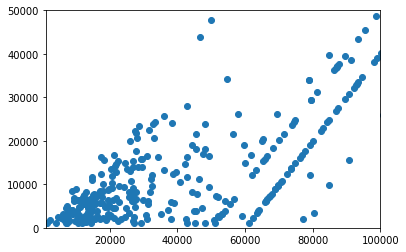

In [51]:
# SANDBOX

# test = tobe[['vystavleno','repair_cost','vystavleno_TO_BE','vystavleno_TO_BE_realistic']]
# test = test.loc[(test.vystavleno/test.repair_cost > 2.0)&(test.repair_cost > 7500)]
# print(test.repair_cost.sum())
# print(test.vystavleno.sum())
# print(tobe.vystavleno.sum())
# test
import matplotlib.pyplot as plt
tobe['delta'] = tobe['repair_cost']-tobe['vystavleno_TO_BE']
grouped = tobe.groupby('repair_cost').sum()
grouped = grouped.loc[grouped.delta > 1000]
grouped = grouped[['delta']]
plt.scatter(grouped.index, grouped.delta)
plt.xlim(1000,100000)
plt.ylim(0,50000)
#          range = (1000,100000),
#         histtype = 'stepfilled',
#         bins = 100,
#                label = 'delta',
#                alpha = 0.7)
# plt.legend()

In [66]:
# deductibles['a'] = [1,2,3,4,5,6,7,8]
# test = dtp.loc[(dtp.vystavleno == 0.01)&(dtp.repair_cost > 3000)]
# test = dtp.groupby(dtp.tariff).count()
test = tobe.loc[tobe.vystavleno <=1.0]
# test.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/vystavleno_less_1.csv', encoding = 'utf-8-sig')
# tobe.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/tobe.csv', encoding = 'utf-8-sig',index=False)
test = tobe.loc[(tobe.vystavleno/tobe.repair_cost > 2)&(tobe.repair_cost > 30000)]
# test.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/vystavleno_much_higher_repair_cost.csv', encoding = 'utf-8-sig', index = False)
test = dtp.loc[(dtp.responsibility == 'Не виновен')&(dtp.vystavleno > 1000)]
# test.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/not_guilty_vystavleno.csv', \
# encoding = 'utf-8-sig', index = False)
tobe.groupby('deductible_TO_BE').mean()

,day_of_year,phone,repair_cost,vystavleno,insurance_paid_sum,user_id,login,score,deductible_AS_IS,vystavleno_TO_BE
deductible_TO_BE,,,,,,,,,,
0.10,38.000000,7.903685e+10,5766.880000,5767.000000,NaN,9.500007e+07,7.903685e+10,0.960000,50000.000000,576.688000
0.25,48.000000,7.945768e+10,93584.260000,35732.000000,NaN,2.496882e+07,7.945768e+10,0.892500,62500.000000,23396.065000
0.50,60.679245,7.943448e+10,34254.958742,34767.019623,10300.000000,1.592582e+08,7.943448e+10,0.547987,51572.327044,27940.017736
0.75,57.847222,7.942089e+10,45405.183639,51357.604611,14572.610000,1.752002e+08,7.942089e+10,0.228167,51458.333333,52447.242833
0.90,59.126147,7.946282e+10,46323.485940,46492.684702,124008.963333,1.920363e+08,7.946282e+10,0.069931,51376.146789,52988.375800
1.00,59.659341,7.950304e+10,59173.496410,61810.162711,NaN,2.190107e+08,7.950304e+10,0.013443,50915.750916,75751.029853
